# H2O AutoML Binary Classification Demo

This is a [Jupyter](https://jupyter.org/) Notebook. When you execute code within the notebook, the results appear beneath the code. To execute a code chunk, place your cursor on the cell and press *Shift+Enter*. 

### Start H2O

Import the **h2o** Python module and `H2OAutoML` class and initialize a local H2O cluster.

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.321-b07, mixed mode)
  Starting server from C:\Users\thanh\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\thanh\AppData\Local\Temp\tmp6s3gd_9e
  JVM stdout: C:\Users\thanh\AppData\Local\Temp\tmp6s3gd_9e\h2o_thanh_started_from_python.out
  JVM stderr: C:\Users\thanh\AppData\Local\Temp\tmp6s3gd_9e\h2o_thanh_started_from_python.err


C:\Users\thanh\Anaconda3\lib\site-packages\h2o\backend\server.py:386: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Australia/Sydney
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_thanh_04s1vs
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,242.1 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


### Load Data

For the AutoML binary classification demo, we use a subset of the [Product Backorders](https://www.kaggle.com/tiredgeek/predict-bo-trial/data) dataset.  The goal here is to predict whether or not a product will be put on backorder status, given a number of product metrics such as current inventory, transit time, demand forecasts and prior sales.

In [2]:
# Use local data file or download from GitHub
import os
docker_data_path = "/home/h2o/data/automl/product_backorders.csv"
if os.path.isfile(docker_data_path):
  data_path = docker_data_path
else:
  data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/product_backorders.csv"


# Load data into H2O
df = h2o.import_file(data_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


For classification, the response should be encoded as categorical (aka. "factor" or "enum"). Let's take a look.

In [3]:
df.describe()

Rows:19053
Cols:23




,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
type,int,int,int,int,int,int,int,int,int,int,int,int,enum,int,real,real,int,enum,enum,enum,enum,enum,enum
mins,1111620.0,-1440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,-99.0,-99.0,0.0,,,,,,
mean,2059552.760562641,376.36702881435997,7.706036161335188,48.27234556237863,182.9108276911772,344.7398309977431,497.79242114102766,56.11887891670601,168.53445651603428,333.53219965359784,504.25539285151945,48.84070750013119,,2.3114995013908577,-6.5198336220017845,-6.05393533826694,0.8917755734005144,,,,,,
maxs,3284775.0,730722.0,52.0,170920.0,479808.0,967776.0,1418208.0,186451.0,550609.0,1136154.0,1759152.0,85584.0,,13824.0,1.0,1.0,1440.0,,,,,,
sigma,663337.6456498681,7002.071628662684,6.7786650721241895,1465.9992102068286,4304.865591970627,8406.062155159249,12180.570042918363,1544.2177775482571,4581.340080221506,9294.566153218984,14184.14539565362,968.7738680675267,,110.24106014611976,25.975138766871872,25.18449715003253,23.033345417338797,,,,,,
zeros,0,1858,121,15432,12118,11136,10604,10278,8022,6864,6231,9909,,18601,474,401,18585,,,,,,
missing,0,0,1078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1113121.0,0.0,8.0,1.0,6.0,6.0,6.0,0.0,4.0,9.0,12.0,0.0,No,1.0,0.9,0.89,0.0,No,No,No,Yes,No,Yes
1,1113268.0,0.0,8.0,0.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,No,0.0,0.96,0.97,0.0,No,No,No,Yes,No,Yes
2,1113874.0,20.0,2.0,0.0,45.0,99.0,153.0,16.0,42.0,80.0,111.0,10.0,No,0.0,0.81,0.88,0.0,No,No,No,Yes,No,Yes


We will notice that the response column, `"went_on_backorder"`, is already encoded as "enum", so there's nothing we need to do here.  If it were encoded as a 0/1 "int", then we'd have to convert the column as follows:  `df[y] = df[y].asfactor()`


Next, let's identify the response & predictor columns by saving them as `x` and `y`.  The `"sku"` column is a unique identifier so we'll want to remove that from the set of our predictors.

In [4]:
y = "went_on_backorder"
x = df.columns
x.remove(y)
x.remove("sku")

## Run AutoML 

Run AutoML, stopping after 10 models.  The `max_models` argument specifies the number of individual (or "base") models, and does not include the two ensemble models that are trained at the end.

The implementation is available in both R and Python API and the current version of AutoML performs:
1. Trains and cross-validates a default Random Forest (DRF), an Extremely Randomized Forest (XRT), a random grid of Gradient Boosting Machines (GBMs), a random grid of Deep Neural Nets, a fixed grid of GLMs.
2. AutoML then trains two Stacked Ensemble models.
3. First ensemble containing all the models and second ensemble containing just the best performing model from each algorithm class.

## Create training and testing data
Split the data into Training and Testing with Training set having 80% and testing having 20% of total samples

In [9]:
df_train, df_test = df.split_frame(ratios=[0.7])

## Training

In [10]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df_train)

AutoML progress: |
16:37:14.707: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220415_163714

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.027917237867709128
RMSE: 0.1670845231244029
LogLoss: 0.10430885332474356
Null degrees of freedom: 10027
Residual degrees of freedom: 10021
Null deviance: 7305.650995030517
Residual deviance: 2092.018362281057
AIC: 2106.018362281057
AUC: 0.9868429585004403
AUCPR: 0.9310551129281335
Gini: 0.9736859170008807

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43702819671734494: 


,,No,Yes,Error,Rate
0,No,8681.0,157.0,0.0178,(157.0/8838.0)
1,Yes,193.0,997.0,0.1622,(193.0/1190.0)
2,Total,8874.0,1154.0,0.0349,(350.0/10028.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.437028,0.850683,175.0
1,max f2,0.252842,0.877389,234.0
2,max f0point5,0.610752,0.888958,123.0
3,max accuracy,0.506067,0.965895,154.0
4,max precision,0.982564,1.000000,0.0
5,max recall,0.012150,1.000000,375.0
6,max specificity,0.982564,1.000000,0.0
7,max absolute_mcc,0.499558,0.831082,156.0
8,max min_per_class_accuracy,0.206014,0.939496,249.0
9,max mean_per_class_accuracy,0.184133,0.942737,256.0



Gains/Lift Table: Avg response rate: 11.87 %, avg score: 12.32 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010072,0.944602,8.426891,8.426891,1.000000,0.961856,1.000000,0.961856,0.084874,0.084874,742.689076,742.689076,0.084874
1,2,0.020044,0.919511,8.342622,8.384966,0.990000,0.932329,0.995025,0.947166,0.083193,0.168067,734.262185,738.496593,0.167954
2,3,0.030016,0.891465,8.426891,8.398894,1.000000,0.904199,0.996678,0.932891,0.084034,0.252101,742.689076,739.889444,0.251988
3,4,0.040088,0.856856,8.426891,8.405928,1.000000,0.874284,0.997512,0.918167,0.084874,0.336975,742.689076,740.592834,0.336862
4,5,0.050060,0.820192,8.258353,8.376531,0.980000,0.839590,0.994024,0.902514,0.082353,0.419328,725.835294,737.653085,0.418988
5,6,0.100020,0.539113,7.114920,7.746354,0.844311,0.698372,0.919242,0.800545,0.355462,0.774790,611.491974,674.635421,0.765625
6,7,0.150080,0.257212,2.954448,6.147991,0.350598,0.385443,0.729568,0.662086,0.147899,0.922689,195.444776,514.799073,0.876638
7,8,0.200040,0.116084,0.891467,4.835170,0.105788,0.174019,0.573779,0.540191,0.044538,0.967227,-10.853251,383.517012,0.870486
8,9,0.300060,0.041085,0.268854,3.313065,0.031904,0.068960,0.393154,0.383114,0.026891,0.994118,-73.114606,231.306473,0.787510
9,10,0.399980,0.021568,0.033640,2.493822,0.003992,0.029812,0.295936,0.294854,0.003361,0.997479,-96.635972,149.382182,0.677950




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.05052229533050133
RMSE: 0.22477165152772563
LogLoss: 0.17040420282632804
Null degrees of freedom: 13291
Residual degrees of freedom: 13285
Null deviance: 9666.953196809258
Residual deviance: 4530.025327935104
AIC: 4544.025327935104
AUC: 0.9507046142540949
AUCPR: 0.7426134366720878
Gini: 0.9014092285081898

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34935343617157705: 


,,No,Yes,Error,Rate
0,No,11142.0,577.0,0.0492,(577.0/11719.0)
1,Yes,389.0,1184.0,0.2473,(389.0/1573.0)
2,Total,11531.0,1761.0,0.0727,(966.0/13292.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.349353,0.710258,201.0
1,max f2,0.159240,0.776472,269.0
2,max f0point5,0.539772,0.724338,145.0
3,max accuracy,0.539772,0.930785,145.0
4,max precision,0.984201,1.000000,0.0
5,max recall,0.003234,1.000000,392.0
6,max specificity,0.984201,1.000000,0.0
7,max absolute_mcc,0.349353,0.670254,201.0
8,max min_per_class_accuracy,0.118529,0.885400,288.0
9,max mean_per_class_accuracy,0.087274,0.889359,304.0



Gains/Lift Table: Avg response rate: 11.83 %, avg score: 11.83 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010006,9.231332e-01,7.497077,7.497077,0.887218,0.949675,0.887218,0.949675,0.075016,0.075016,649.707709,649.707709,0.073736
1,2,0.020012,8.811617e-01,7.624146,7.560612,0.902256,0.902804,0.894737,0.926240,0.076287,0.151303,662.414619,656.061164,0.148914
2,3,0.030018,8.419560e-01,6.988801,7.370008,0.827068,0.861191,0.872180,0.904557,0.069930,0.221233,598.880067,637.000798,0.216881
3,4,0.040024,8.051539e-01,7.179404,7.322357,0.849624,0.825016,0.866541,0.884671,0.071837,0.293071,617.940433,632.235707,0.287012
4,5,0.050030,7.628921e-01,6.925266,7.242939,0.819549,0.785923,0.857143,0.864922,0.069294,0.362365,592.526612,624.293888,0.354258
5,6,0.100060,5.000809e-01,5.349609,6.296274,0.633083,0.636973,0.745113,0.750948,0.267641,0.630006,434.960924,529.627406,0.601079
6,7,0.150015,2.703470e-01,3.321498,5.305677,0.393072,0.381889,0.627884,0.628051,0.165925,0.795931,232.149833,430.567673,0.732615
7,8,0.200045,1.296233e-01,1.677312,4.398244,0.198496,0.189473,0.520496,0.518365,0.083916,0.879847,67.731216,339.824444,0.771050
8,9,0.300030,4.184065e-02,0.699406,3.165607,0.082769,0.072433,0.374624,0.369758,0.069930,0.949777,-30.059406,216.560744,0.736961
9,10,0.400015,2.055598e-02,0.216180,2.428389,0.025583,0.029370,0.287380,0.284677,0.021615,0.971392,-78.381998,142.838926,0.648071




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.928956,0.009074,0.935864,0.936282,0.928334,0.930363,0.913936
1,auc,0.950819,0.003157,0.954669,0.949657,0.953383,0.946904,0.949480
2,err,0.071044,0.009074,0.064136,0.063718,0.071666,0.069637,0.086064
3,err_count,188.400000,19.099740,174.000000,170.000000,194.000000,186.000000,218.000000
4,f0point5,0.697354,0.032912,0.717250,0.734628,0.685968,0.700637,0.648290
5,f1,0.714764,0.023728,0.735562,0.727564,0.730556,0.680412,0.699724
6,f2,0.735632,0.046904,0.754835,0.720635,0.781343,0.661323,0.760024
7,lift_top_group,7.403384,0.516754,7.074717,7.792966,6.927125,8.108683,7.113431
8,logloss,0.170413,0.007047,0.163224,0.169309,0.164241,0.176408,0.178882
9,max_per_class_error,0.248163,0.070019,0.231746,0.283912,0.180685,0.350820,0.193651



See the whole table with table.as_data_frame()


*Note: If you see the following error, it means that you need to install the pandas module.*
```
H2OTypeError: Argument `python_obj` should be a None | list | tuple | dict | numpy.ndarray | pandas.DataFrame | scipy.sparse.issparse, got H2OTwoDimTable 
``` 

See this link for the training parameters: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

## Leaderboard

Next, we will view the AutoML Leaderboard.  Since we did not specify a `leaderboard_frame` in the `H2OAutoML.train()` method for scoring and ranking the models, the AutoML leaderboard uses cross-validation metrics to rank the models.  

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric.  In the case of binary classification, the default ranking metric is Area Under the ROC Curve (AUC).  In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

The leader model is stored at `aml.leader` and the leaderboard is stored at `aml.leaderboard`.

In [11]:
lb = aml.leaderboard

Now we will view a snapshot of the top models.  Here we should see the two Stacked Ensembles at or near the top of the leaderboard.  Stacked Ensembles can almost always outperform a single model.

In [12]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20220415_163714,0.950705,0.170404,0.742613,0.148267,0.224772,0.0505223
StackedEnsemble_BestOfFamily_1_AutoML_1_20220415_163714,0.949465,0.171873,0.736928,0.150953,0.225301,0.0507607
GBM_3_AutoML_1_20220415_163714,0.946983,0.175433,0.730784,0.139525,0.227054,0.0515537
GBM_1_AutoML_1_20220415_163714,0.946031,0.177884,0.723603,0.150906,0.230833,0.053284
GBM_grid_1_AutoML_1_20220415_163714_model_1,0.945617,0.177887,0.728827,0.14549,0.22958,0.052707
GBM_4_AutoML_1_20220415_163714,0.945435,0.177572,0.721822,0.148052,0.22903,0.0524548
GBM_2_AutoML_1_20220415_163714,0.944193,0.180317,0.717197,0.142394,0.230613,0.0531822
GBM_5_AutoML_1_20220415_163714,0.941803,0.183839,0.713443,0.152928,0.231585,0.0536315
XRT_1_AutoML_1_20220415_163714,0.941406,0.207577,0.717793,0.173253,0.243304,0.059197
DRF_1_AutoML_1_20220415_163714,0.931008,0.219048,0.674382,0.168064,0.25367,0.0643484


To view the entire leaderboard, specify the `rows` argument of the `head()` method as the total number of rows:

In [13]:
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20220415_163714,0.950705,0.170404,0.742613,0.148267,0.224772,0.0505223
StackedEnsemble_BestOfFamily_1_AutoML_1_20220415_163714,0.949465,0.171873,0.736928,0.150953,0.225301,0.0507607
GBM_3_AutoML_1_20220415_163714,0.946983,0.175433,0.730784,0.139525,0.227054,0.0515537
GBM_1_AutoML_1_20220415_163714,0.946031,0.177884,0.723603,0.150906,0.230833,0.053284
GBM_grid_1_AutoML_1_20220415_163714_model_1,0.945617,0.177887,0.728827,0.14549,0.22958,0.052707
GBM_4_AutoML_1_20220415_163714,0.945435,0.177572,0.721822,0.148052,0.22903,0.0524548
GBM_2_AutoML_1_20220415_163714,0.944193,0.180317,0.717197,0.142394,0.230613,0.0531822
GBM_5_AutoML_1_20220415_163714,0.941803,0.183839,0.713443,0.152928,0.231585,0.0536315
XRT_1_AutoML_1_20220415_163714,0.941406,0.207577,0.717793,0.173253,0.243304,0.059197
DRF_1_AutoML_1_20220415_163714,0.931008,0.219048,0.674382,0.168064,0.25367,0.0643484


In the leaderboard, you can check model performance by AUC, logloss, mean_per_class_error, RMSE, and MSE. You can set up the rank in the training process by specifying sort_metric.

### Explore the best model
This is one of the most important features provided by H2O AutoML. You can get the best model parameters, Confusion Matrix, Gain/Lift Table, Scoring History, and Variable Importance by this single line of code.

In [14]:
aml.leader #Best model

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220415_163714

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.027917237867709128
RMSE: 0.1670845231244029
LogLoss: 0.10430885332474356
Null degrees of freedom: 10027
Residual degrees of freedom: 10021
Null deviance: 7305.650995030517
Residual deviance: 2092.018362281057
AIC: 2106.018362281057
AUC: 0.9868429585004403
AUCPR: 0.9310551129281335
Gini: 0.9736859170008807

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43702819671734494: 


,,No,Yes,Error,Rate
0,No,8681.0,157.0,0.0178,(157.0/8838.0)
1,Yes,193.0,997.0,0.1622,(193.0/1190.0)
2,Total,8874.0,1154.0,0.0349,(350.0/10028.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.437028,0.850683,175.0
1,max f2,0.252842,0.877389,234.0
2,max f0point5,0.610752,0.888958,123.0
3,max accuracy,0.506067,0.965895,154.0
4,max precision,0.982564,1.000000,0.0
5,max recall,0.012150,1.000000,375.0
6,max specificity,0.982564,1.000000,0.0
7,max absolute_mcc,0.499558,0.831082,156.0
8,max min_per_class_accuracy,0.206014,0.939496,249.0
9,max mean_per_class_accuracy,0.184133,0.942737,256.0



Gains/Lift Table: Avg response rate: 11.87 %, avg score: 12.32 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010072,0.944602,8.426891,8.426891,1.000000,0.961856,1.000000,0.961856,0.084874,0.084874,742.689076,742.689076,0.084874
1,2,0.020044,0.919511,8.342622,8.384966,0.990000,0.932329,0.995025,0.947166,0.083193,0.168067,734.262185,738.496593,0.167954
2,3,0.030016,0.891465,8.426891,8.398894,1.000000,0.904199,0.996678,0.932891,0.084034,0.252101,742.689076,739.889444,0.251988
3,4,0.040088,0.856856,8.426891,8.405928,1.000000,0.874284,0.997512,0.918167,0.084874,0.336975,742.689076,740.592834,0.336862
4,5,0.050060,0.820192,8.258353,8.376531,0.980000,0.839590,0.994024,0.902514,0.082353,0.419328,725.835294,737.653085,0.418988
5,6,0.100020,0.539113,7.114920,7.746354,0.844311,0.698372,0.919242,0.800545,0.355462,0.774790,611.491974,674.635421,0.765625
6,7,0.150080,0.257212,2.954448,6.147991,0.350598,0.385443,0.729568,0.662086,0.147899,0.922689,195.444776,514.799073,0.876638
7,8,0.200040,0.116084,0.891467,4.835170,0.105788,0.174019,0.573779,0.540191,0.044538,0.967227,-10.853251,383.517012,0.870486
8,9,0.300060,0.041085,0.268854,3.313065,0.031904,0.068960,0.393154,0.383114,0.026891,0.994118,-73.114606,231.306473,0.787510
9,10,0.399980,0.021568,0.033640,2.493822,0.003992,0.029812,0.295936,0.294854,0.003361,0.997479,-96.635972,149.382182,0.677950




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.05052229533050133
RMSE: 0.22477165152772563
LogLoss: 0.17040420282632804
Null degrees of freedom: 13291
Residual degrees of freedom: 13285
Null deviance: 9666.953196809258
Residual deviance: 4530.025327935104
AIC: 4544.025327935104
AUC: 0.9507046142540949
AUCPR: 0.7426134366720878
Gini: 0.9014092285081898

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34935343617157705: 


,,No,Yes,Error,Rate
0,No,11142.0,577.0,0.0492,(577.0/11719.0)
1,Yes,389.0,1184.0,0.2473,(389.0/1573.0)
2,Total,11531.0,1761.0,0.0727,(966.0/13292.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.349353,0.710258,201.0
1,max f2,0.159240,0.776472,269.0
2,max f0point5,0.539772,0.724338,145.0
3,max accuracy,0.539772,0.930785,145.0
4,max precision,0.984201,1.000000,0.0
5,max recall,0.003234,1.000000,392.0
6,max specificity,0.984201,1.000000,0.0
7,max absolute_mcc,0.349353,0.670254,201.0
8,max min_per_class_accuracy,0.118529,0.885400,288.0
9,max mean_per_class_accuracy,0.087274,0.889359,304.0



Gains/Lift Table: Avg response rate: 11.83 %, avg score: 11.83 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010006,9.231332e-01,7.497077,7.497077,0.887218,0.949675,0.887218,0.949675,0.075016,0.075016,649.707709,649.707709,0.073736
1,2,0.020012,8.811617e-01,7.624146,7.560612,0.902256,0.902804,0.894737,0.926240,0.076287,0.151303,662.414619,656.061164,0.148914
2,3,0.030018,8.419560e-01,6.988801,7.370008,0.827068,0.861191,0.872180,0.904557,0.069930,0.221233,598.880067,637.000798,0.216881
3,4,0.040024,8.051539e-01,7.179404,7.322357,0.849624,0.825016,0.866541,0.884671,0.071837,0.293071,617.940433,632.235707,0.287012
4,5,0.050030,7.628921e-01,6.925266,7.242939,0.819549,0.785923,0.857143,0.864922,0.069294,0.362365,592.526612,624.293888,0.354258
5,6,0.100060,5.000809e-01,5.349609,6.296274,0.633083,0.636973,0.745113,0.750948,0.267641,0.630006,434.960924,529.627406,0.601079
6,7,0.150015,2.703470e-01,3.321498,5.305677,0.393072,0.381889,0.627884,0.628051,0.165925,0.795931,232.149833,430.567673,0.732615
7,8,0.200045,1.296233e-01,1.677312,4.398244,0.198496,0.189473,0.520496,0.518365,0.083916,0.879847,67.731216,339.824444,0.771050
8,9,0.300030,4.184065e-02,0.699406,3.165607,0.082769,0.072433,0.374624,0.369758,0.069930,0.949777,-30.059406,216.560744,0.736961
9,10,0.400015,2.055598e-02,0.216180,2.428389,0.025583,0.029370,0.287380,0.284677,0.021615,0.971392,-78.381998,142.838926,0.648071




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.928956,0.009074,0.935864,0.936282,0.928334,0.930363,0.913936
1,auc,0.950819,0.003157,0.954669,0.949657,0.953383,0.946904,0.949480
2,err,0.071044,0.009074,0.064136,0.063718,0.071666,0.069637,0.086064
3,err_count,188.400000,19.099740,174.000000,170.000000,194.000000,186.000000,218.000000
4,f0point5,0.697354,0.032912,0.717250,0.734628,0.685968,0.700637,0.648290
5,f1,0.714764,0.023728,0.735562,0.727564,0.730556,0.680412,0.699724
6,f2,0.735632,0.046904,0.754835,0.720635,0.781343,0.661323,0.760024
7,lift_top_group,7.403384,0.516754,7.074717,7.792966,6.927125,8.108683,7.113431
8,logloss,0.170413,0.007047,0.163224,0.169309,0.164241,0.176408,0.178882
9,max_per_class_error,0.248163,0.070019,0.231746,0.283912,0.180685,0.350820,0.193651



See the whole table with table.as_data_frame()


## Ensemble Exploration

To understand how the ensemble works, let's take a peek inside the Stacked Ensemble "All Models" model.  The "All Models" ensemble is an ensemble of all of the individual models in the AutoML run.  This is often the top performing model on the leaderboard.

In [15]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

C:\Users\thanh\Anaconda3\lib\site-packages\h2o\estimators\stackedensemble.py:929: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


Examine the variable importance of the metalearner (combiner) algorithm in the ensemble.  This shows us how much each base learner is contributing to the ensemble. The AutoML Stacked Ensembles use the default metalearner algorithm (GLM with non-negative weights), so the variable importance of the metalearner is actually the standardized coefficient magnitudes of the GLM. 

In [16]:
metalearner.coef_norm()

{'Intercept': -3.689028894328383,
 'GBM_3_AutoML_1_20220415_163714': 0.685757741172353,
 'GBM_1_AutoML_1_20220415_163714': 0.4331323324868701,
 'GBM_grid_1_AutoML_1_20220415_163714_model_1': 0.5516670599111577,
 'GBM_4_AutoML_1_20220415_163714': 0.10510141622144516,
 'GBM_2_AutoML_1_20220415_163714': 0.0,
 'GBM_5_AutoML_1_20220415_163714': 0.0,
 'XRT_1_AutoML_1_20220415_163714': 0.6739875931072219,
 'DRF_1_AutoML_1_20220415_163714': 5.565107324243919e-05,
 'GLM_1_AutoML_1_20220415_163714': 0.0,
 'DeepLearning_1_AutoML_1_20220415_163714': 0.0}

We can also plot the base learner contributions to the ensemble.

C:\Users\thanh\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


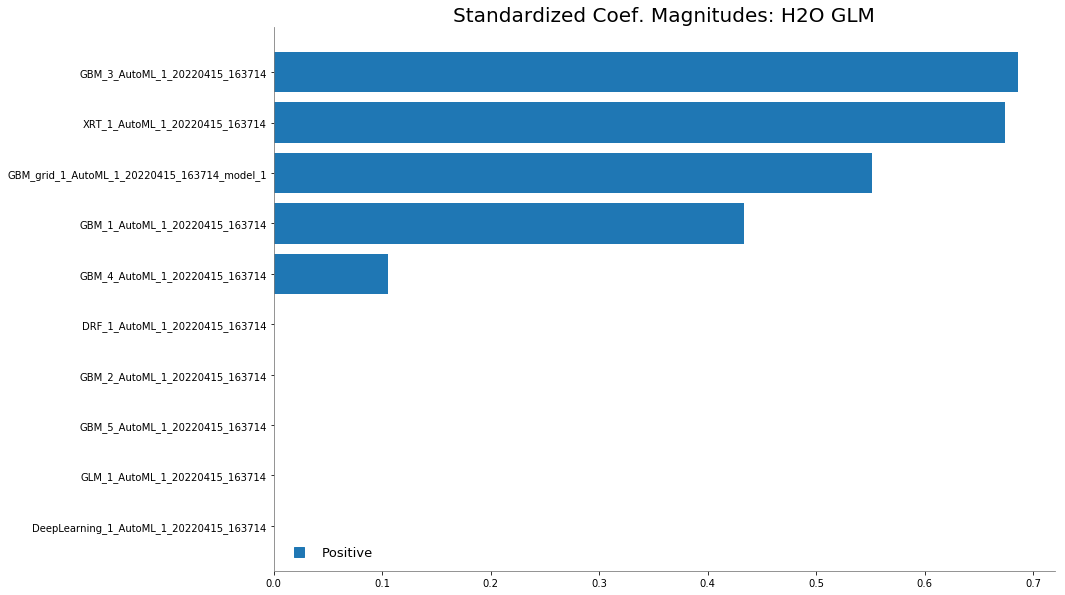

In [17]:
%matplotlib inline
metalearner.std_coef_plot()

## Explore the importance of features for an ensemble model

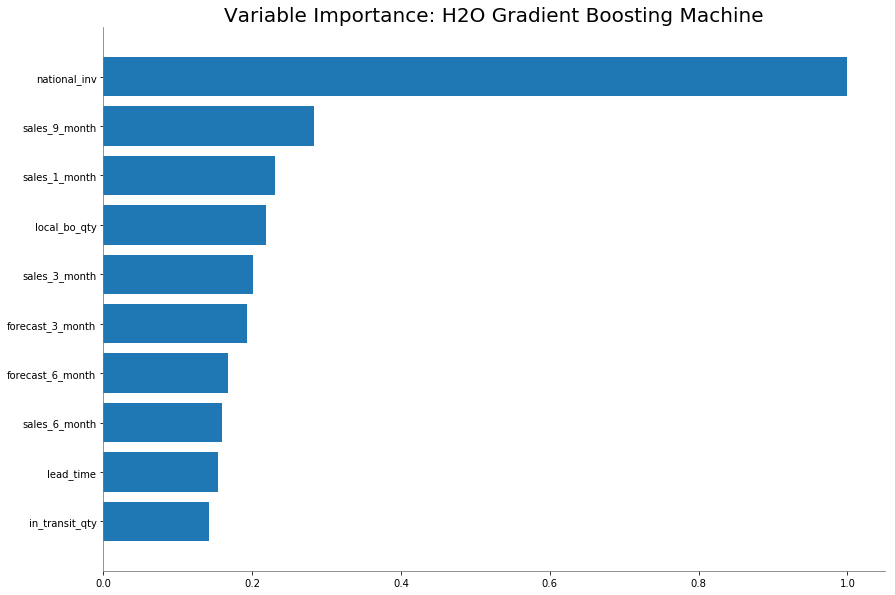

<Figure size 432x288 with 0 Axes>

In [18]:
aml.leader.varimp()
model = h2o.get_model("GBM_3_AutoML_1_20220415_163714")
model.varimp_plot(num_of_features=10)

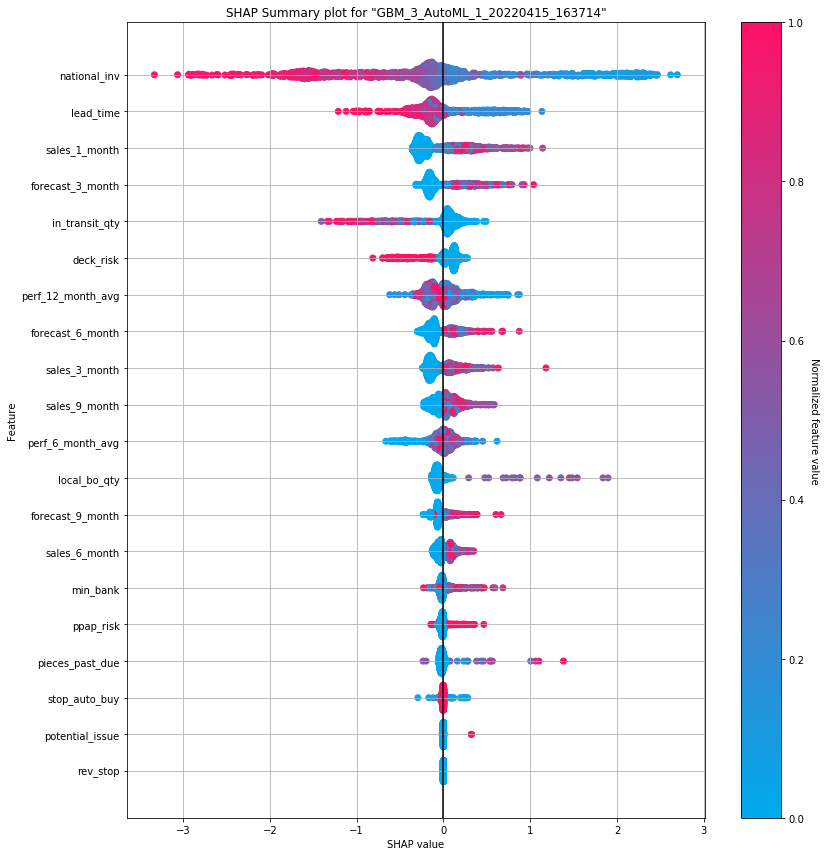

In [30]:
model.shap_summary_plot(df_test)

To understand the meaning of the SHAP beeswarm plot, see the following link: https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/

See the following link for further model explanation: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html

## Testing

In [31]:
pred = aml.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [32]:
pred.head()

predict,No,Yes
Yes,0.380942,0.619058
Yes,0.239515,0.760485
Yes,0.132847,0.867153
No,0.660266,0.339734
Yes,0.579122,0.420878
No,0.833642,0.166358
No,0.97905,0.0209495
Yes,0.0946637,0.905336
No,0.88248,0.11752
Yes,0.378783,0.621217


## Save Leader Model

There are two ways to save the leader model -- binary format and MOJO format.  If you're taking your leader model to production, then we'd suggest the MOJO format since it's optimized for production use. This example is to save the best model.

In [33]:
h2o.save_model(aml.leader, path = "./product_backorders_model_bin")

'C:\\Users\\thanh\\OneDrive - UTS (1)\\AutoML Course\\Demo\\product_backorders_model_bin\\StackedEnsemble_AllModels_1_AutoML_1_20220415_163714'

In [34]:
aml.leader.download_mojo(path = "./")

'C:\\Users\\thanh\\OneDrive - UTS (1)\\AutoML Course\\Demo\\StackedEnsemble_AllModels_1_AutoML_1_20220415_163714.zip'